<h1 style="font-size:3rem;color:red;">NBA Web Scraping Tutorial<h1>

<h3> Install and import requests and pandas <h3>

In [12]:
!pip install requests
import requests
import pandas as pd

<ol><li> Go to the nba.com site and click on <em style= "color:red">Stats</em></li> 
    <li>On the right hand side select <em style= "color:red">Sortable Team Stats</em></li>
    <li>Right click on the sight and select Inspect</li>
    <li>Click on <em style= "color:red">Network</em> and <em style= "color:red">Fetch/XHR</em></li>
    <li>Lastly refresh the page and you should see below image</li></ol> 
    <img src="nbasnapshot.png">

Now you want to find where the data is stored. To do that look under the <em style = "color:red">Name</em> tab and click on the name that starts with <em style="color:red">leaguedashteamstats...</em>. Most times the stats name will be similar to website/data name you are looking for. This is where you'll get the url,data, the headings and parameters.
<img src="headersnba.png">

Copy the url from <em style="color:red">Request URL</em> under Headers tab and save it to url as shown below.

In [13]:
url = "https://stats.nba.com/stats/leaguedashteamstats?Conference=&DateFrom=&DateTo=&Division=&GameScope=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2021-22&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision="

Now scroll down to  <em style="color:red">Request Headers</em> under Headers, copy everything, and save it to headers as shown below.

In [14]:
headers = {'Accept': 'application/json, text/plain, */*',
'Accept-Encoding': 'gzip, deflate, br',
'Accept-Language': 'en-US,en;q=0.9',
'Cache-Control': 'no-cache',
'Connection': 'keep-alive',
'Host': 'stats.nba.com',
'Origin': 'https://www.nba.com',
'Pragma': 'no-cache',
'Referer': 'https://www.nba.com/',
'sec-ch-ua': 'Not;A Brand;v=99, Google Chrome;v=97, Chromium;v=97',
'sec-ch-ua-mobile': '?0',
'sec-ch-ua-platform': "Windows",
'Sec-Fetch-Dest': 'empty',
'Sec-Fetch-Mode': 'cors',
'Sec-Fetch-Site': 'same-site',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36',
'x-nba-stats-origin': 'stats',
'x-nba-stats-token': 'true'}

Lastly go to <em style="color:red">Payload</em> tab, copy everything under <em style="color:red">Query String Parameters</em>, and save it to params as shown below.

In [15]:
params = (
('Conference', ''), 
('DateFrom','') ,
('DateTo',''), 
('Division',''), 
('GameScope',''), 
('GameSegment',''), 
('LastNGames', '0'),
('LeagueID', '00'),
('Location', ''), 
('MeasureType', 'Base'),
('Month', '0'),
('OpponentTeamID', '0'),
('Outcome', ''), 
('PORound', '0'),
('PaceAdjust', 'N'),
('PerMode', 'PerGame'),
('Period', '0'),
('PlayerExperience', '') ,
('PlayerPosition', '' ),
('PlusMinus', 'N'),
('Rank', 'N'),
('Season', '2021-22'),
('SeasonSegment', ''), 
('SeasonType', 'Regular Season'),
('ShotClockRange', ''), 
('StarterBench', ''), 
('TeamID', '0'),
('TwoWay', '0'),
('VsConference', ''), 
('VsDivision', ''),
)

Now request the data and check the response you get. If it's <em style= "color:red">Response [200] </em> then everything worked fine.

In [17]:
response = requests.get(url, headers=headers, params=params)
print(response)

<Response [200]>


Below gives you the data in json format

In [18]:
jsn = response.json()
print(jsn)

{'resource': 'leaguedashteamstats', 'parameters': {'MeasureType': 'Base', 'PerMode': 'PerGame', 'PlusMinus': 'N', 'PaceAdjust': 'N', 'Rank': 'N', 'LeagueID': '00', 'Season': '2021-22', 'SeasonType': 'Regular Season', 'PORound': 0, 'Outcome': None, 'Location': None, 'Month': 0, 'SeasonSegment': None, 'DateFrom': None, 'DateTo': None, 'OpponentTeamID': 0, 'VsConference': None, 'VsDivision': None, 'TeamID': 0, 'Conference': None, 'Division': None, 'GameSegment': None, 'Period': 0, 'ShotClockRange': None, 'LastNGames': 0, 'GameScope': None, 'PlayerExperience': None, 'PlayerPosition': None, 'StarterBench': None, 'TwoWay': 0}, 'resultSets': [{'name': 'LeagueDashTeamStats', 'headers': ['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT

Below you create a data frame with all the data

In [20]:
frame = pd.DataFrame(jsn['resultSets'][0]['rowSet'])
print(frame)

            0                       1   2   3   4      5     6     7     8   \
0   1610612737           Atlanta Hawks  53  25  28  0.472  48.0  40.8  87.5   
1   1610612738          Boston Celtics  55  30  25  0.545  48.7  39.4  87.6   
2   1610612751           Brooklyn Nets  53  29  24  0.547  48.2  41.5  88.4   
3   1610612766       Charlotte Hornets  54  28  26  0.519  48.4  42.1  91.9   
4   1610612741           Chicago Bulls  53  33  20  0.623  48.1  41.6  87.0   
5   1610612739     Cleveland Cavaliers  54  33  21  0.611  48.0  39.5  85.1   
6   1610612742        Dallas Mavericks  54  31  23  0.574  48.3  39.1  86.4   
7   1610612743          Denver Nuggets  53  29  24  0.547  48.2  40.8  86.5   
8   1610612765         Detroit Pistons  53  12  41  0.226  48.2  37.1  88.2   
9   1610612744   Golden State Warriors  53  40  13  0.755  48.2  40.4  86.5   
10  1610612745         Houston Rockets  53  15  38  0.283  48.1  38.7  85.6   
11  1610612754          Indiana Pacers  55  19  36  

Below you add the headers to the data table/dataframe

In [53]:
#add the headers to the data table/dataframe
frame.columns = jsn['resultSets'][0]['headers'] 
#check the columns names/header and theyre data types
frame.dtypes


TEAM_ID              int64
TEAM_NAME           object
GP                   int64
W                    int64
L                    int64
W_PCT              float64
MIN                float64
FGM                float64
FGA                float64
FG_PCT             float64
FG3M               float64
FG3A               float64
FG3_PCT            float64
FTM                float64
FTA                float64
FT_PCT             float64
OREB               float64
DREB               float64
REB                float64
AST                float64
TOV                float64
STL                float64
BLK                float64
BLKA               float64
PF                 float64
PFD                float64
PTS                float64
PLUS_MINUS         float64
GP_RANK              int64
W_RANK               int64
L_RANK               int64
W_PCT_RANK           int64
MIN_RANK             int64
FGM_RANK             int64
FGA_RANK             int64
FG_PCT_RANK          int64
FG3M_RANK            int64
F

In [55]:
frame.to_csv("frame.csv")
frame.head(10)


,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,53,25,28,0.472,48.0,40.8,87.5,0.466,...,1,27,23,11,5,5,9,16,10,Atlanta Hawks
1,1610612738,Boston Celtics,55,30,25,0.545,48.7,39.4,87.6,0.450,...,18,19,2,16,8,18,19,6,10,Boston Celtics
2,1610612751,Brooklyn Nets,53,29,24,0.547,48.2,41.5,88.4,0.470,...,16,25,7,21,20,16,10,15,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,54,28,26,0.519,48.4,42.1,91.9,0.459,...,7,5,12,15,17,13,2,18,10,Charlotte Hornets
4,1610612741,Chicago Bulls,53,33,20,0.623,48.1,41.6,87.0,0.478,...,6,21,20,21,9,28,7,12,10,Chicago Bulls
5,1610612739,Cleveland Cavaliers,54,33,21,0.611,48.0,39.5,85.1,0.464,...,27,22,24,10,1,17,23,4,10,Cleveland Cavaliers
6,1610612742,Dallas Mavericks,54,31,23,0.574,48.3,39.1,86.4,0.453,...,3,23,27,1,19,10,25,9,10,Dallas Mavericks
7,1610612743,Denver Nuggets,53,29,24,0.547,48.2,40.8,86.5,0.472,...,15,20,29,18,15,20,14,11,10,Denver Nuggets
8,1610612765,Detroit Pistons,53,12,41,0.226,48.2,37.1,88.2,0.420,...,23,8,14,25,29,7,29,30,10,Detroit Pistons
9,1610612744,Golden State Warriors,53,40,13,0.755,48.2,40.4,86.5,0.467,...,29,2,10,4,26,29,12,1,10,Golden State Warriors


In [45]:
#this makes text labeling in charts better for visual purposes
!pip install adjustText
!pip install numpy
from adjustText import adjust_text
#Importing plt to plot graphs
import matplotlib.pyplot as plt
import numpy as np

<Figure size 504x504 with 0 Axes>

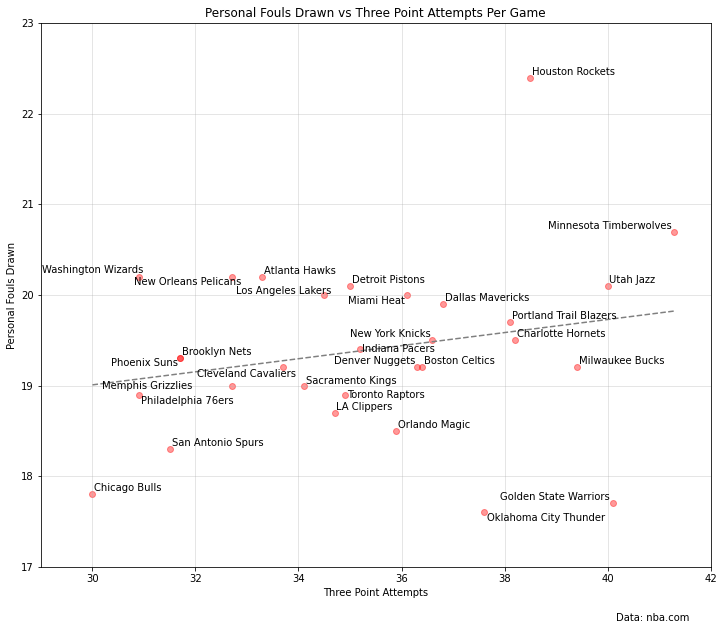

In [69]:
#define the x and y variable to plot on x and y axis
y = frame["PFD"]
x = frame["FG3A"]

#create the figure and size
plt.figure(figsize=(7,7))

fig, ax = plt.subplots(figsize=(12,10))


#put grid lines in the plot
plt.grid(zorder=0, alpha=.4)

#choose x and y axis ranges
plt.xlim(29,42)
plt.ylim(17,23)

#label the plot
plt.ylabel("Personal Fouls Drawn")
plt.xlabel("Three Point Attempts")
plt.title("Personal Fouls Drawn vs Three Point Attempts Per Game")

# Put caption/source. 0.79 is where on x axis and 0.05 is where on y axis
plt.figtext(.79, .05, 'Data: nba.com', fontsize=10)

#This is the dashed line fitting the data and showing where its trending.
#In this case its slightly trending up as it goes right which shows a 
#slight positive correlation to Fouls Drawn as teams shoot more Threes
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
         color='grey', linestyle='--')

#create the plot. Alpha is how transparent the points are
plt.scatter(frame.FG3A, frame.PFD,alpha=0.4,color="red")

#Put text labels on the points to know which point relates to which team
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    frame.FG3A, frame.PFD, frame.TEAM_NAME)]

#adjust points and text
adjust_text(texts, force_points =0.2, force_text =0.2)

#show plot
plt.show()